In [1]:
!python3 -m pip install bs4 urllib tqdm seaborn numpy

  Obtaining dependency information for bs4 from https://files.pythonhosted.org/packages/51/bb/bf7aab772a159614954d84aa832c129624ba6c32faa559dfb200a534e50b/bs4-0.0.2-py2.py3-none-any.whl.metadata
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import numpy as np
from tqdm import tqdm

def get_quarter_scores(url):
    html = urlopen(f'https://www.pro-football-reference.com/{url}')
    soup = BeautifulSoup(html)
    scores = soup.find('div', class_='linescore_wrap').find('table').find('tbody')
    team_qtr_scores = []
    for scoreline in scores.findAll('tr'):
        team_qtr_scores.append([int(value.getText()) for value in scoreline.findAll('td')[2:-1]])
    tups = []
    for i in range(len(team_qtr_scores[0])):
        tups.append((sum(team_qtr_scores[0][:i+1]) % 10, sum(team_qtr_scores[1][:i+1]) % 10))
    return tups


In [3]:
url = "https://www.pro-football-reference.com/years/2023/games.htm"
html = urlopen(url)
soup = BeautifulSoup(html)
games = soup.find('table', id='games')
flag = False
scores = []
for row in tqdm(games.findAll('tr')):
    time.sleep(3.1)
    for value in row.findAll('td'):
        if value.getText() == 'boxscore':
            boxscore_url = value.find('a').attrs['href']
            tups = get_quarter_scores(boxscore_url)
            scores.extend(tups)

100%|██████████| 304/304 [16:49<00:00,  3.32s/it]


In [4]:
arr = np.zeros(shape=(10,10))
for score in scores:
    arr[score[0], score[1]] += 1
print(arr)

[[74. 16.  5. 48. 33.  3. 18. 92. 13.  9.]
 [13. 10.  1.  9. 11.  0.  1. 12.  8.  1.]
 [ 8.  1.  0.  1.  2.  0.  4.  3.  0.  5.]
 [60. 10.  6. 36. 18.  5.  8. 50. 12.  6.]
 [23.  9.  8.  9. 12.  2.  8. 26.  6.  3.]
 [ 4.  3.  0.  2.  1.  3.  2.  1.  1.  2.]
 [26.  9.  5. 14.  9.  2.  5. 10.  4.  4.]
 [62. 21.  5. 46. 34.  1. 16. 56.  4.  8.]
 [ 6.  2.  1.  6.  4.  1.  0.  4.  0.  1.]
 [ 4.  2.  2.  6.  7.  3. 13.  5.  1.  3.]]


[(0, 7), (0, 0), (7, 0), (3, 0), (7, 7), (3, 7), (0, 3), (7, 3), (3, 3), (7, 4)]
[(1, 5), (2, 2), (2, 5), (2, 8), (5, 2), (8, 6), (8, 8), (1, 2), (1, 6), (1, 9)]


<Axes: >

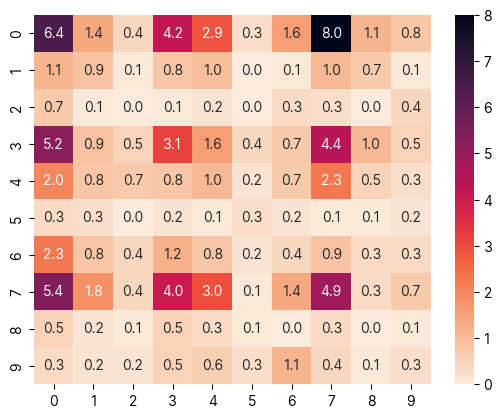

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Inter'

matrix = pd.DataFrame(arr, columns=list(range(10)))
matrix = matrix * 100 / len(scores)
# Indices (row and column labels)
top_indices = matrix.stack().nlargest(10).index.tolist()
bottom_indices = matrix.stack().nsmallest(10).index.tolist()
print(top_indices)
print(bottom_indices)
sns.heatmap(matrix, cmap=sns.cm.rocket_r, annot=True, fmt=".1f",)